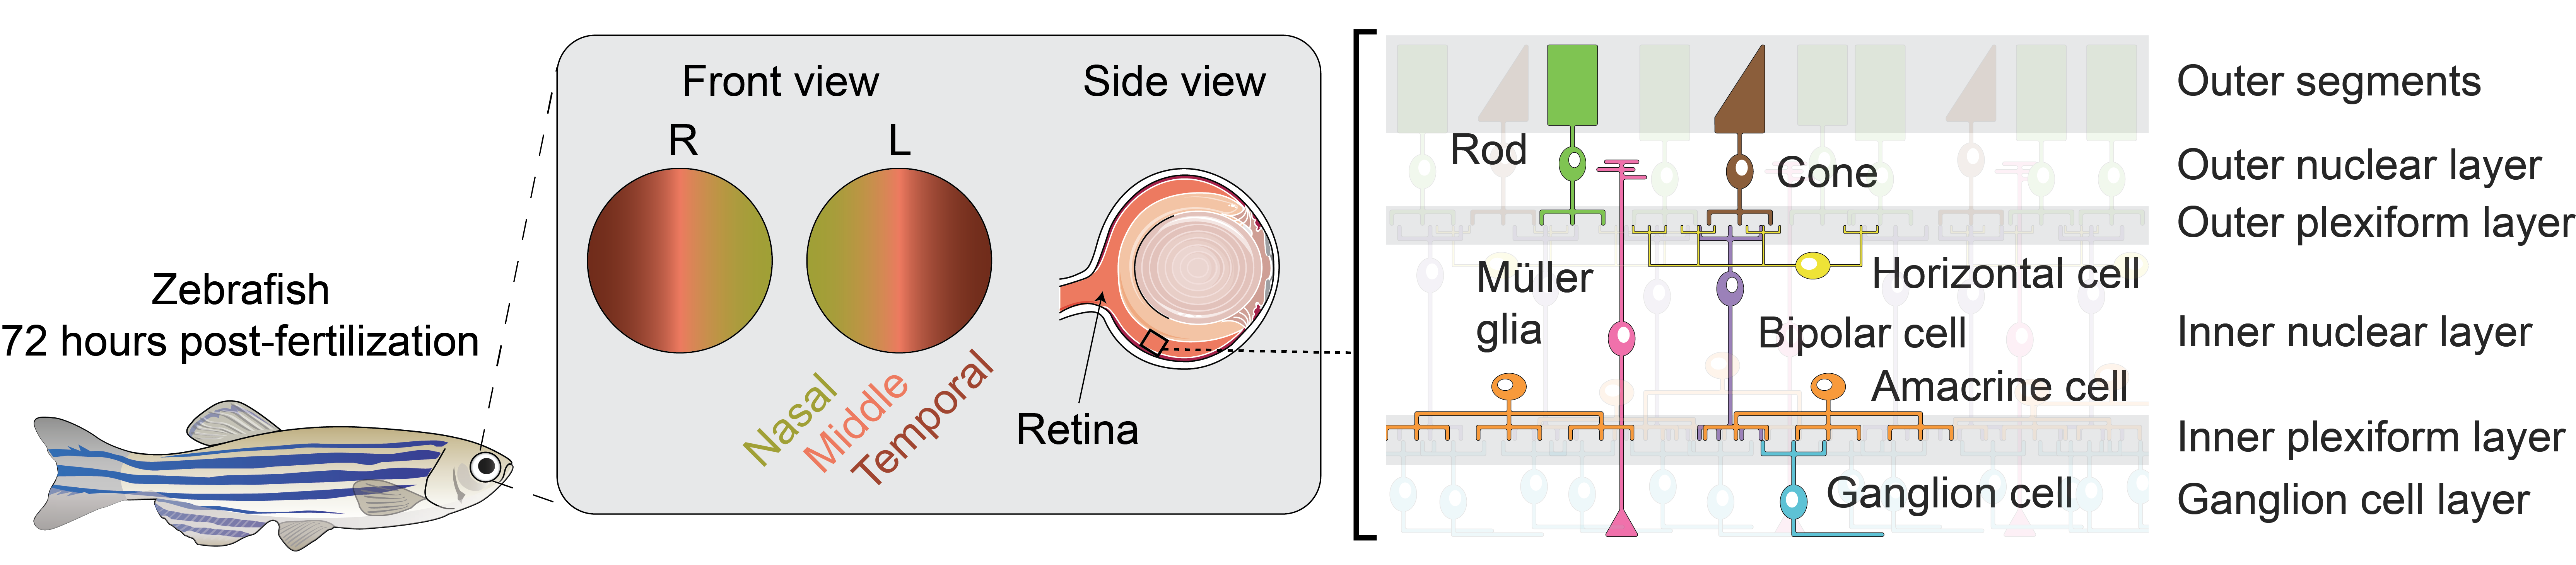

In [1]:
import lma.resample as resample
import lma.plot as plot

First, we will import the zebrafish retina dataset, [He et al., 2014](https://pubmed.ncbi.nlm.nih.gov/22958820/). This dataset consists of 60 trees, acquired by confocal time lapse microscopy of zebrafish retinal progenitors developing from 32 through 72 hours post fertilization, spanning the nasal-temporal axis. During this period, the vast majority of progenitors exit the cell cycle and terminally differentiate to form the major neuronal and glial cell types (ganglion, amacrine, bipolar, photoreceptor, horizontal, and Müller glia, abbreviated G, A, B, R, H, and M here respectively).

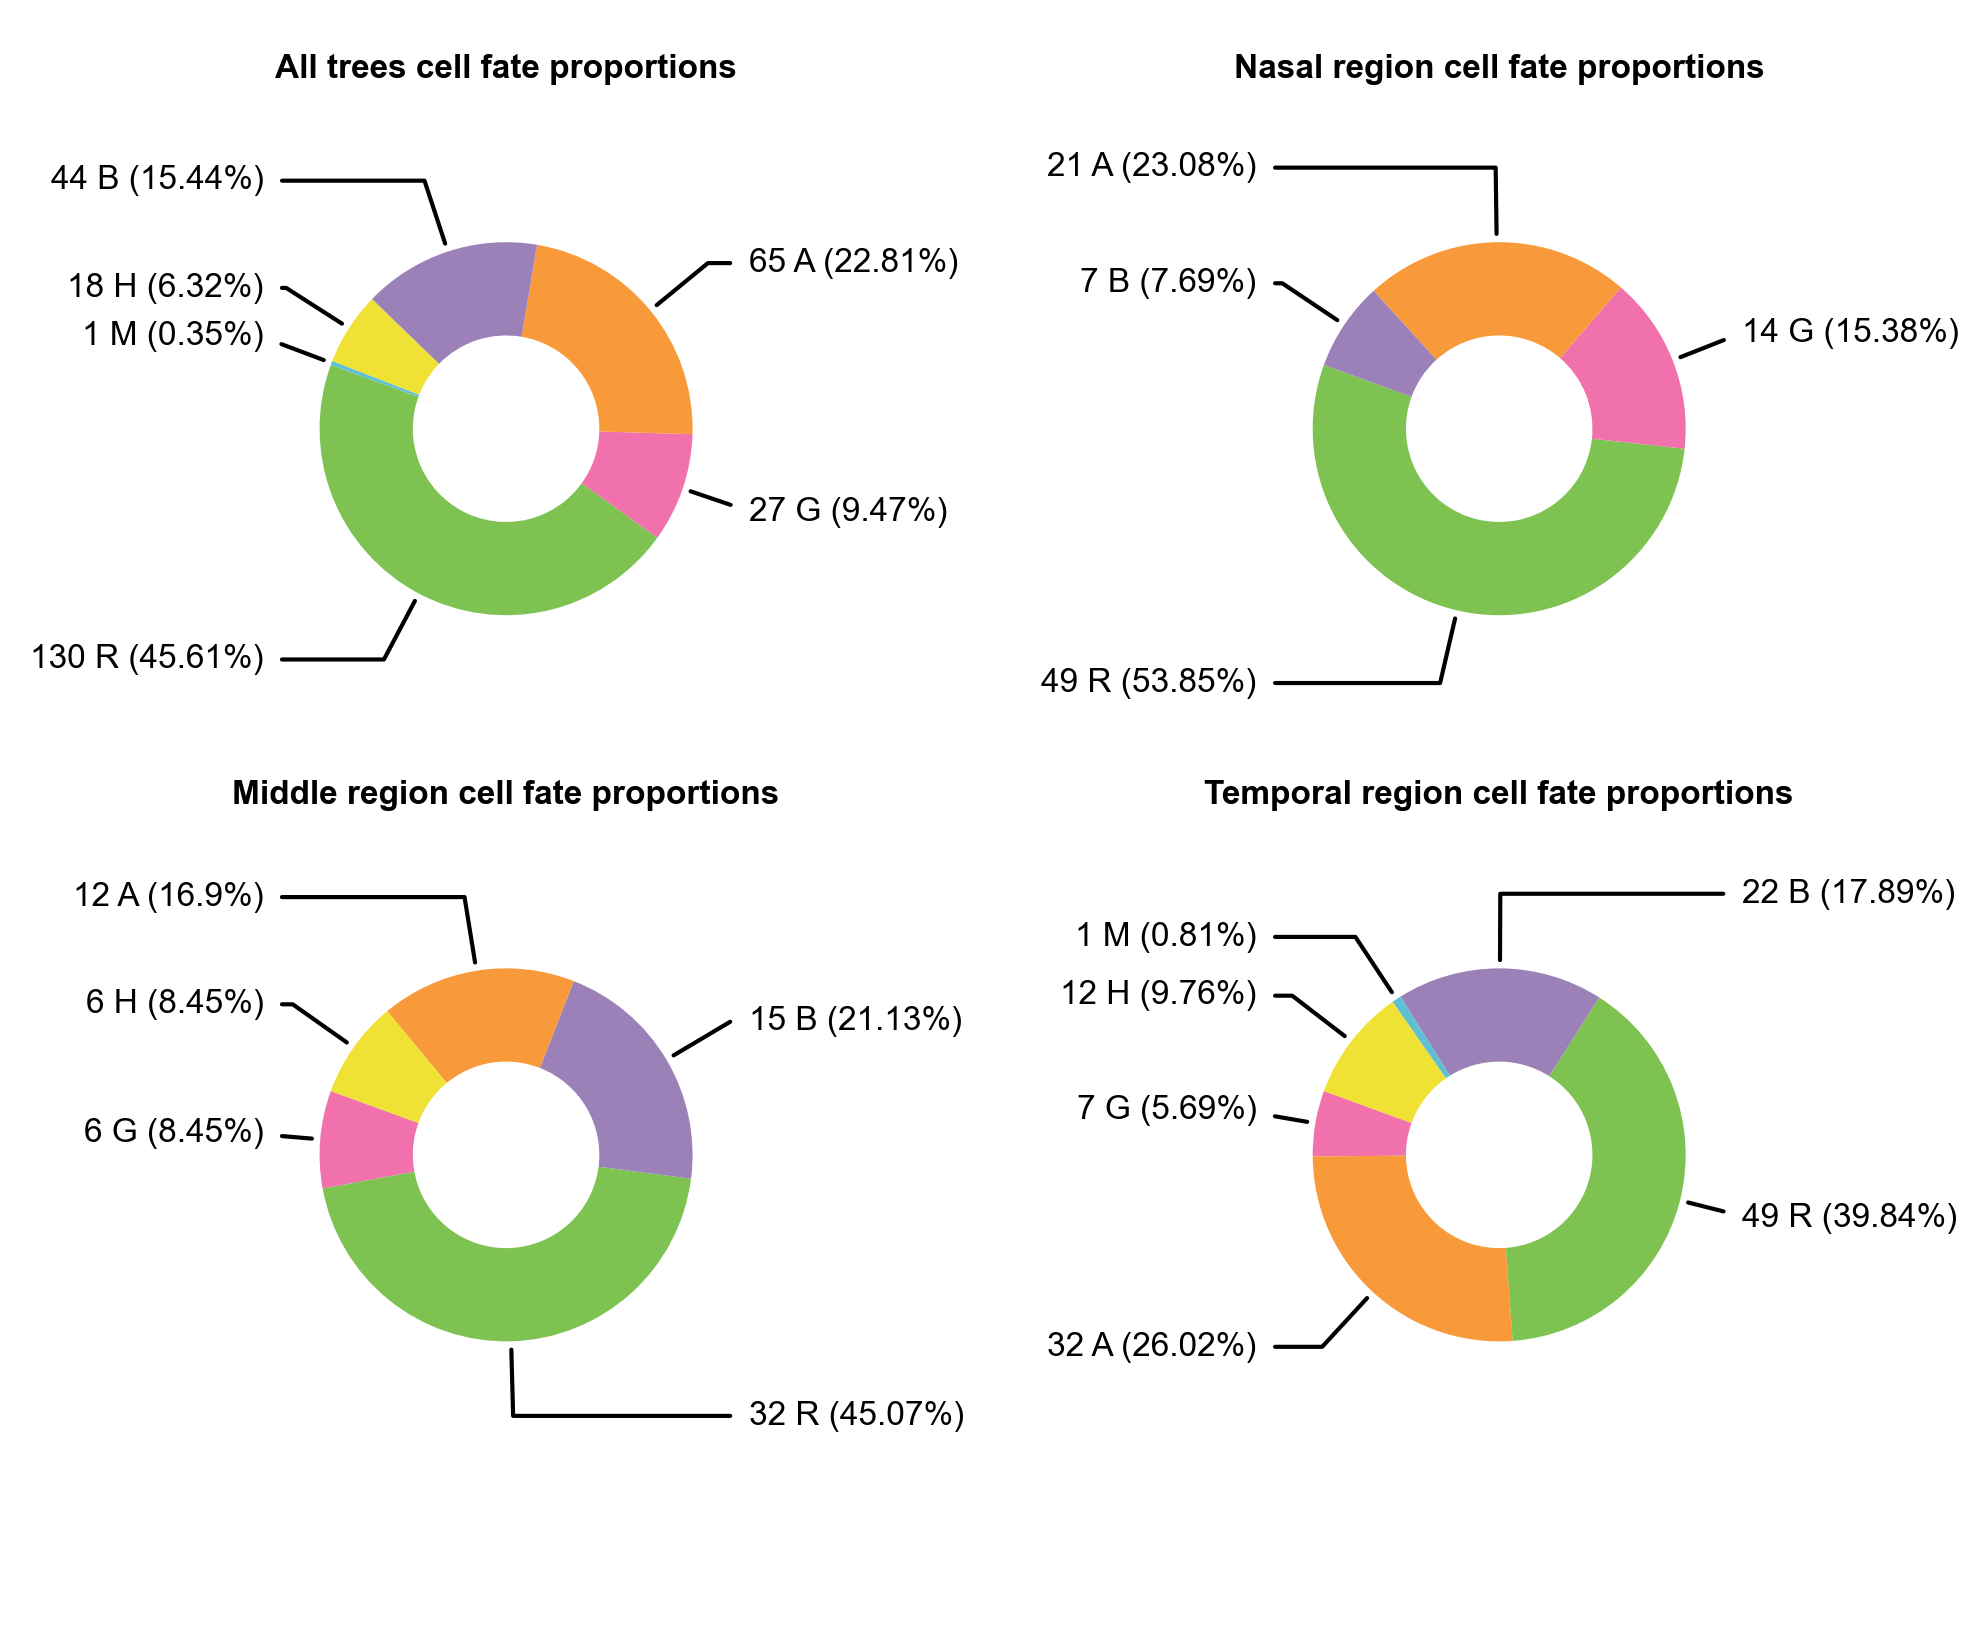

The data should first be formatted into a list where each entry is a tree is represented in [NEWICK format](https://evolution.genetics.washington.edu/phylip/newicktree.html), without branch lengths or interior nodes, separated by semi-colons.

Here, we have different datasets corresponding to progenitor developing in different parts of the eye (nasal, medial, and temporal), so we will load these together using the `multi_dataset_resample_trees` function. This function will resample the dataset `num_resamples` times with replacement, automatically detect all cell fates across all provided datasets (or can take a list of input cell fates to use) and count the number of subtree occurences for each doublet, triplet, or quartet. 

It will output the subtree dictionary, a list of the detected cell fates, and a DataFrame that lists the number of occurrences for each subtree in each resample and in the original dataset. The DataFrame will also contain the expected number of occurrences for each subtree based on the probabilities of observing each of its constituent cell fates and contain labels corresponding to which dataset each line corresponds to.

In [2]:
datasets = ['datasets/zebrafish_retina_temporal.txt',
            'datasets/zebrafish_retina_middle.txt',
            'datasets/zebrafish_retina_nasal.txt']

dataset_names = ['Temporal region', 'Middle region', "Nasal region"]

## Doublet motif analysis

In [3]:
num_resamples = 10000

In [4]:
(subtree_dict, 
 cell_fates, 
 dfs_dataset_concat) = resample.multi_dataset_resample_trees(datasets, 
                                                             dataset_names,
                                                             'doublet',
                                                             num_resamples, 
                                                             True,
                                                             cell_fates='auto',
                                                             )

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

In [5]:
subtree_dict

{'(A,A)': 0,
 '(A,B)': 1,
 '(A,G)': 2,
 '(A,H)': 3,
 '(A,M)': 4,
 '(A,R)': 5,
 '(B,B)': 6,
 '(B,G)': 7,
 '(B,H)': 8,
 '(B,M)': 9,
 '(B,R)': 10,
 '(G,G)': 11,
 '(G,H)': 12,
 '(G,M)': 13,
 '(G,R)': 14,
 '(H,H)': 15,
 '(H,M)': 16,
 '(H,R)': 17,
 '(M,M)': 18,
 '(M,R)': 19,
 '(R,R)': 20}

In [6]:
cell_fates

['A', 'B', 'G', 'H', 'M', 'R']

In [7]:
dfs_dataset_concat.head()

,0,1,2,3,4,5,6,7,8,9,...,9993,9994,9995,9996,9997,9998,9999,observed,expected,dataset
0,2.0,4.0,2.0,6.0,4.0,1.0,3.0,2.0,4.0,6.0,...,4.0,3.0,5.0,5.0,6.0,6.0,1.0,9.0,3.722652,Temporal region
1,8.0,4.0,3.0,4.0,6.0,6.0,3.0,9.0,3.0,4.0,...,3.0,4.0,3.0,7.0,4.0,6.0,7.0,2.0,5.118646,Temporal region
2,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,...,1.0,4.0,1.0,1.0,0.0,3.0,1.0,0.0,1.628660,Temporal region
3,1.0,1.0,6.0,2.0,3.0,1.0,4.0,0.0,4.0,4.0,...,3.0,2.0,2.0,1.0,4.0,4.0,0.0,2.0,2.791989,Temporal region
4,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.232666,Temporal region


We will now reformat the DataFrame for plotting. The next function `multi_dataset_dfs_for_plotting` generates several DataFrames.

1. `df_true_melt_dataset_label_concat_concat` will contain various characteristics about each of the subtrees (i.e., the observed and expected number, z-score, adjusted p-value, etc.)

2. `df_melt_subset_concat_concat` will contain the number of occurences for each subtree in all of the resamples.

3. `df_melt_100resamples_subset_concat_concat` will contain the number of occurences for each subtree in only 100 resamples.

4. `df_zscores_i_concat_melt_subset_concat_concat` will contain the null z-score for each subtree in `num_null` resamples. The null z-scores are calculated by comparison of each resample set to the rest of the resample sets.

5. `df_zscores_i_concat_melt_100resamples_subset_concat_concat` will contain the null z-score for each subtree in 100 resamples.

We can also specify a cutoff number for how many subtrees we would like to include in the final plot. We can use `None` to keep all subtrees, `auto` to keep all subtrees with an absolute z-score above 1, or any number of top significant subtrees to keep (in order of highest to lowest absolute z-score).

In [8]:
(df_true_melt_dataset_label_concat_concat,
 df_melt_subset_concat_concat, 
 df_melt_100resamples_subset_concat_concat,
 df_zscores_i_concat_melt_subset_concat_concat,
 df_zscores_i_concat_melt_100resamples_subset_concat_concat) = plot.multi_dataset_dfs_for_plotting(dfs_dataset_concat, 
                                                                                                   dataset_names, 
                                                                                                   10000, 
                                                                                                   subtree_dict,
                                                                                                   cutoff='auto',
                                                                                                   num_null=100)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [9]:
df_true_melt_dataset_label_concat_concat.head()

,subtree_val,observed,expected,z-score,abs z-score,label,min,mean,max,adj_p_val,dataset,z-score min,z-score mean,z-score max
15,15,5.0,0.523498,6.217772,6.217772,"(H,H)",0.0,0.5197,6.0,0.008398,Temporal region,-0.721296,-0.027308,2.054901
6,6,9.0,1.759535,5.465513,5.465513,"(B,B)",0.0,1.7841,8.0,0.002100,Temporal region,-1.351515,0.042384,3.195023
1,1,2.0,5.118646,-1.443000,1.443000,"(A,B)",0.0,5.0813,14.0,2.166767,Temporal region,-1.911754,0.130553,2.772983
20,20,21.0,8.728601,4.548901,4.548901,"(R,R)",1.0,8.7384,20.0,0.002100,Temporal region,-2.500769,0.008026,2.695076
0,0,9.0,3.722652,2.818822,2.818822,"(A,A)",0.0,3.7446,12.0,0.222555,Temporal region,-2.008985,-0.115121,1.746442


In [10]:
df_melt_subset_concat_concat.head()

,subtree_val,observed,label,dataset
150000,15,1.0,"(H,H)",Temporal region
150001,15,1.0,"(H,H)",Temporal region
150002,15,0.0,"(H,H)",Temporal region
150003,15,2.0,"(H,H)",Temporal region
150004,15,1.0,"(H,H)",Temporal region


In [11]:
df_melt_100resamples_subset_concat_concat.head()

,subtree_val,observed,label,dataset
1500,15,1.0,"(H,H)",Temporal region
1501,15,1.0,"(H,H)",Temporal region
1502,15,0.0,"(H,H)",Temporal region
1503,15,2.0,"(H,H)",Temporal region
1504,15,1.0,"(H,H)",Temporal region


In [12]:
df_zscores_i_concat_melt_subset_concat_concat.head()

,subtree_val,observed,label,dataset
1500,15,0.666610,"(H,H)",Temporal region
1501,15,0.666610,"(H,H)",Temporal region
1502,15,-0.721296,"(H,H)",Temporal region
1503,15,2.054901,"(H,H)",Temporal region
1504,15,0.666610,"(H,H)",Temporal region


In [13]:
df_zscores_i_concat_melt_100resamples_subset_concat_concat.head()

,subtree_val,observed,label,dataset
1500,15,0.666610,"(H,H)",Temporal region
1501,15,0.666610,"(H,H)",Temporal region
1502,15,-0.721296,"(H,H)",Temporal region
1503,15,2.054901,"(H,H)",Temporal region
1504,15,0.666610,"(H,H)",Temporal region


In [19]:
dataset_color_dict = plot.make_color_dict(dataset_names, ['#712D1B', 
                                                          '#EC7960', 
                                                          '#9E9E36', 
                                                          ])

cell_color_dict = plot.make_color_dict(cell_fates, ['#F89A3A', 
                                                    '#9C80B8', 
                                                    '#F071AB', 
                                                    '#F0E135',
                                                    '#5FC0D4', 
                                                    '#7EC352',
                                                    ])

In [20]:
subtree = 'doublet'

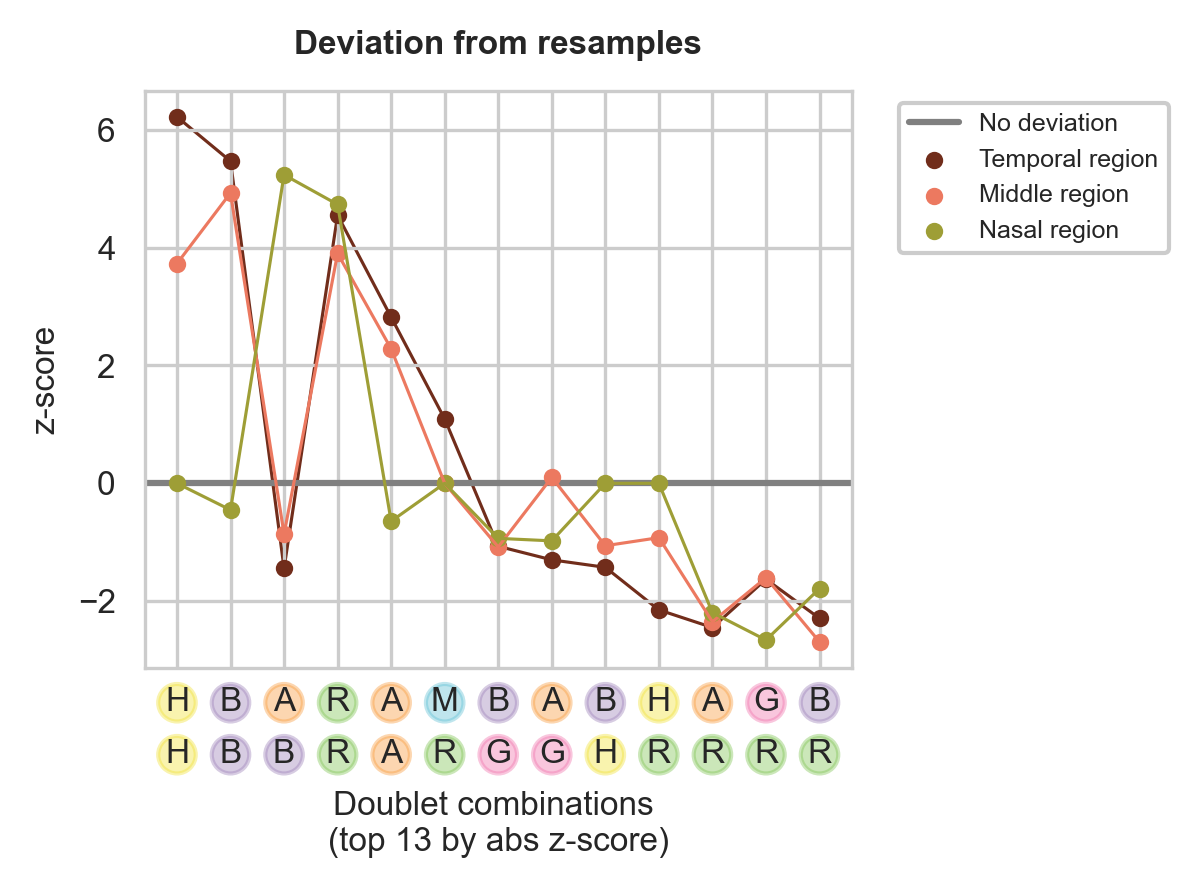

In [21]:
plot.multi_dataset_plot_deviation(subtree, 
                                  dataset_names,
                                  df_true_melt_dataset_label_concat_concat, 
                                  dataset_color_dict,
                                  cell_color_dict,
                                  cutoff='auto', 
                                  legend_bool=True,
                                  legend_pos='outside',
                                  save=False, 
                                  image_format='png',
                                  dpi=300,
                                  image_save_path=None)

## Triplet motif analysis

In [22]:
(subtree_dict, 
 cell_fates, 
 dfs_dataset_concat) = resample.multi_dataset_resample_trees(datasets, 
                                                             dataset_names,
                                                             'triplet',
                                                             num_resamples, 
                                                             False, 
                                                             )

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

In [24]:
cutoff=15

In [25]:
(df_true_melt_dataset_label_concat_concat,
 df_melt_subset_concat_concat, 
 df_melt_100resamples_subset_concat_concat,
 df_zscores_i_concat_melt_subset_concat_concat,
 df_zscores_i_concat_melt_100resamples_subset_concat_concat) = plot.multi_dataset_dfs_for_plotting(dfs_dataset_concat, 
                                                                                                   dataset_names, 
                                                                                                   10000, 
                                                                                                   subtree_dict,
                                                                                                   cutoff=cutoff,
                                                                                                   num_null=1)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
subtree = 'triplet'

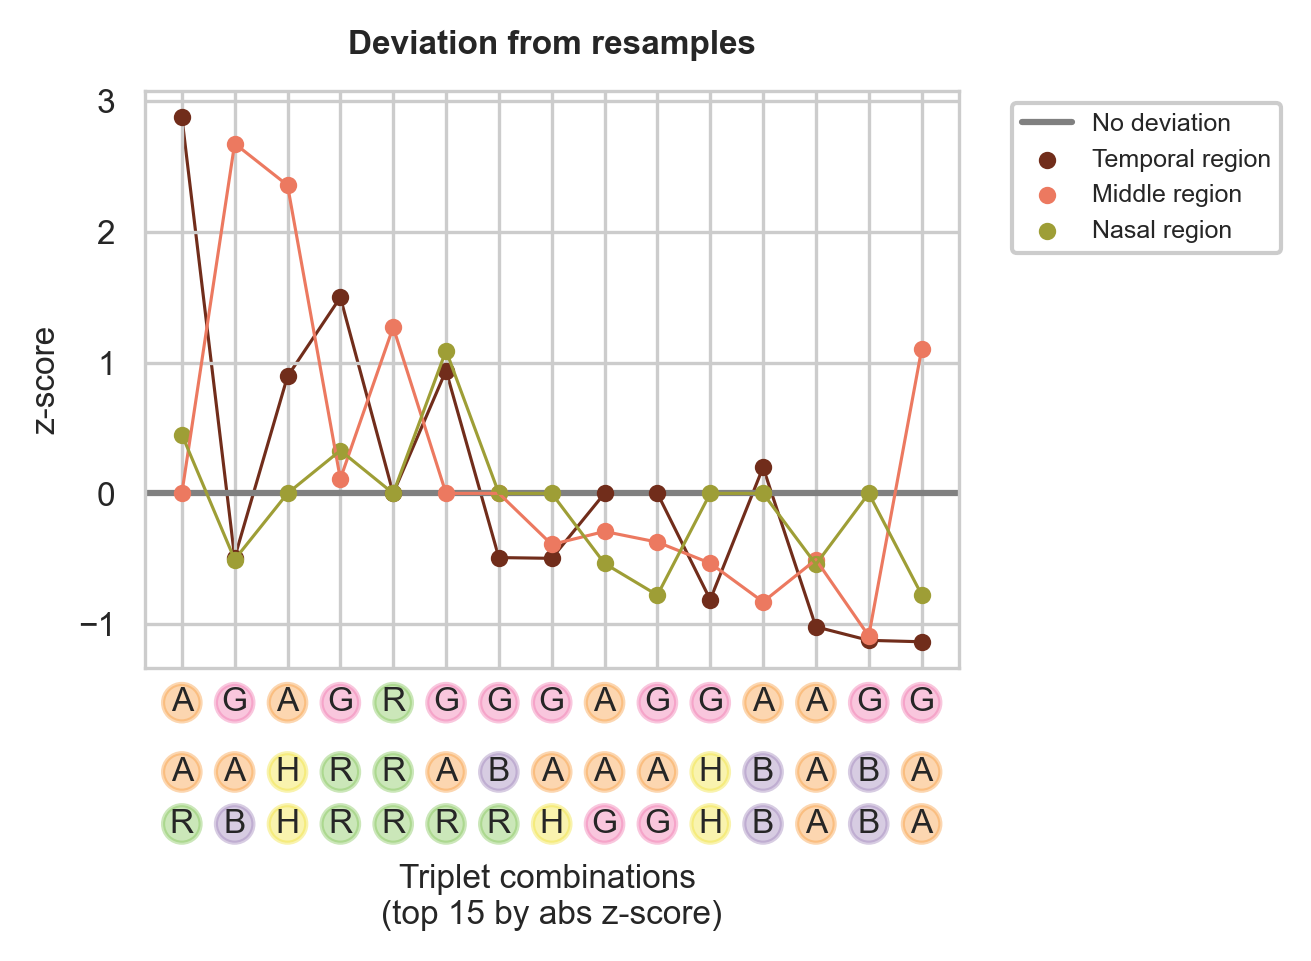

In [27]:
plot.multi_dataset_plot_deviation(subtree, 
                                  dataset_names,
                                  df_true_melt_dataset_label_concat_concat, 
                                  dataset_color_dict,
                                  cell_color_dict,
                                  cutoff=cutoff, 
                                  legend_bool=True,
                                  legend_pos='outside',
                                  save=False, 
                                  image_format='png',
                                  dpi=300,
                                  image_save_path=None)

## Quartet motif analysis

In [28]:
(subtree_dict, 
 cell_fates, 
 dfs_dataset_concat) = resample.multi_dataset_resample_trees(datasets, 
                                                             dataset_names,
                                                             'quartet',
                                                             num_resamples, 
                                                             False, 
                                                             )

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

In [29]:
cutoff=15

In [30]:
(df_true_melt_dataset_label_concat_concat,
 df_melt_subset_concat_concat, 
 df_melt_100resamples_subset_concat_concat,
 df_zscores_i_concat_melt_subset_concat_concat,
 df_zscores_i_concat_melt_100resamples_subset_concat_concat) = plot.multi_dataset_dfs_for_plotting(dfs_dataset_concat, 
                                                                                                   dataset_names, 
                                                                                                   10000, 
                                                                                                   subtree_dict,
                                                                                                   cutoff=cutoff,
                                                                                                   num_null=1)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [31]:
subtree = 'quartet'

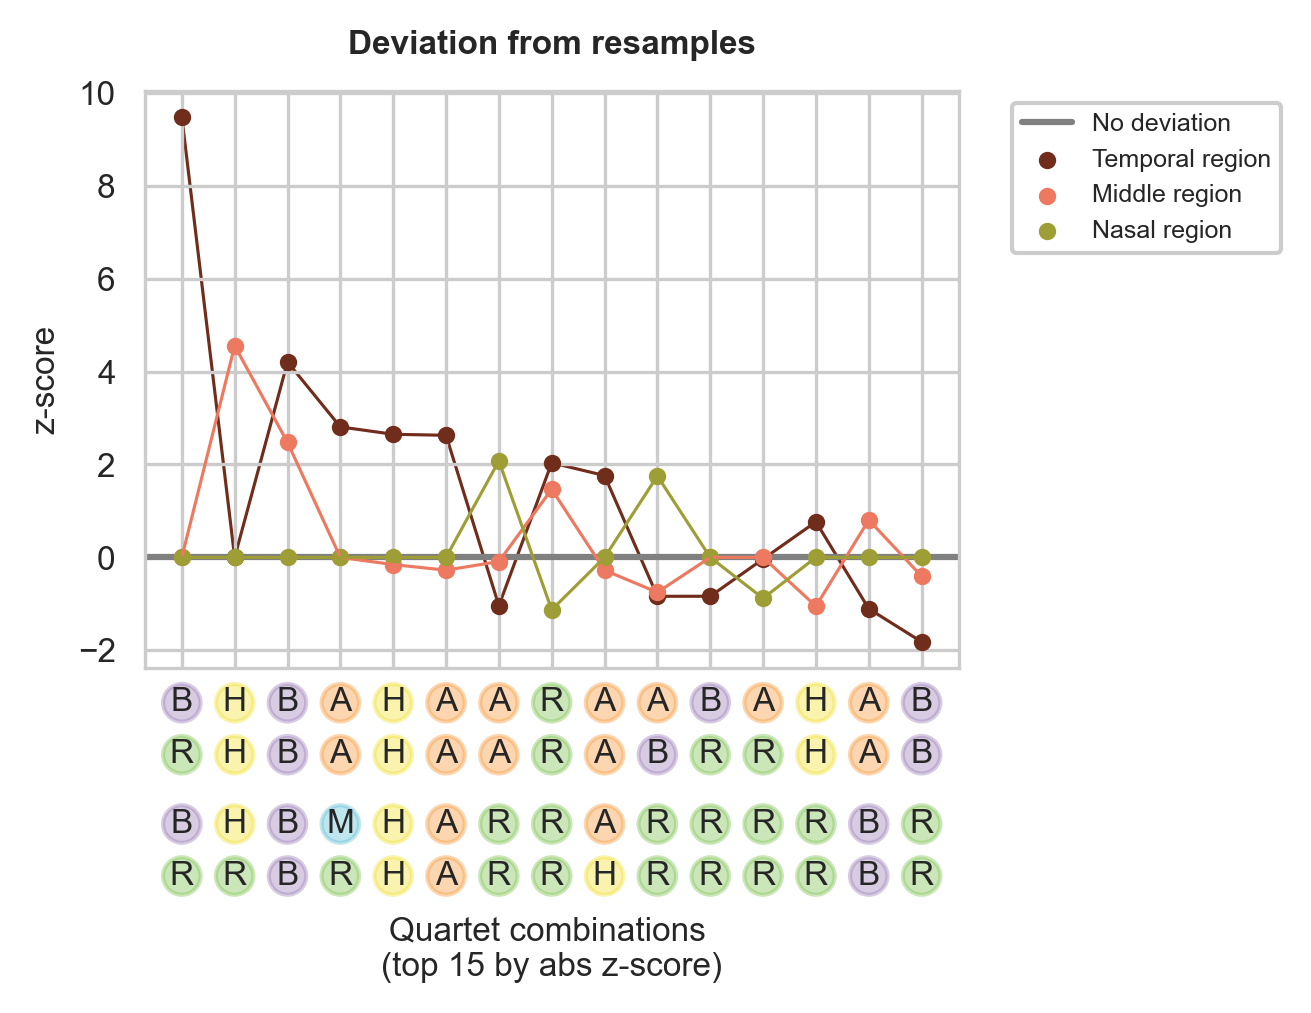

In [32]:
plot.multi_dataset_plot_deviation(subtree, 
                                  dataset_names,
                                  df_true_melt_dataset_label_concat_concat, 
                                  dataset_color_dict,
                                  cell_color_dict,
                                  cutoff=cutoff, 
                                  legend_bool=True,
                                  legend_pos='outside',
                                  save=False, 
                                  image_format='png',
                                  dpi=300,
                                  image_save_path=None)